# Trader Behavior Analysis vs Market Sentiment

**Role:** Junior Data Scientist – Trader Behavior Insights  
**Dataset:** Hyperliquid Historical Trades & Bitcoin Fear–Greed Index  

## Objective
The goal of this analysis is to explore how trader behavior and performance
change under different market sentiment conditions (Fear, Greed, Extreme states).
By combining historical trade data with sentiment indicators, we aim to uncover
patterns that can inform smarter trading strategies.


## 1. Import Libraries

We use standard Python data science libraries for data manipulation,
visualization, and analysis.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load Datasets

Two datasets are used:
- Hyperliquid historical trader data
- Bitcoin Fear & Greed Index data


In [34]:
trades = pd.read_csv("data/historical_data.csv")
sentiment = pd.read_csv("data/fear_greed_index.csv")


In [35]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [36]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [38]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

## 3. Data Cleaning & Preparation

This step involves:
- Understanding column structures
- Handling timestamp inconsistencies
- Creating a common date field
- Preparing data for merging


In [39]:

trades['trade_time'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)


trades['date'] = trades['trade_time'].dt.date


sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [40]:

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [41]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [42]:
trades[['Timestamp', 'date']].head()
sentiment[['date', 'classification']].head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear



4. Merge Trade Data with Market Sentiment

Trade records are merged with market sentiment using the trade date.
This allows each trade to be analyzed in the context of prevailing
market conditions.


In [43]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [44]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed


In [45]:
merged['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [46]:
trades['Timestamp'].head(10)


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64

In [47]:
trades['Timestamp IST'].head()


0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
Name: Timestamp IST, dtype: object

In [48]:
trades['trade_time'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)


In [49]:
trades['date'] = trades['trade_time'].dt.date


In [50]:
trades[['Timestamp IST', 'trade_time', 'date']].head()


,Timestamp IST,trade_time,date
0,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
1,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
2,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
3,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
4,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02


In [51]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [52]:
merged['classification'].value_counts(dropna=False)


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN                  6
Name: count, dtype: int64

In [53]:
merged = merged.dropna(subset=['classification'])


5. Feature Engineering

Additional features are created to support analysis:
- Profit indicator (win/loss)
- Cleaned PnL column


In [54]:
merged = merged.rename(columns={
    'Closed PnL': 'closed_pnl'
})


In [55]:
merged.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'closed_pnl',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_time', 'date', 'classification'],
      dtype='object')

In [56]:
merged = merged.rename(columns={
    'Closed PnL': 'closed_pnl'
})


In [57]:
merged['profit'] = merged['closed_pnl'] > 0


In [58]:
merged.groupby('classification')['closed_pnl'].mean().sort_values()


classification
Neutral          34.307718
Extreme Fear     34.537862
Greed            42.743559
Fear             54.290400
Extreme Greed    67.892861
Name: closed_pnl, dtype: float64

6. Analysis: Trader Performance vs Sentiment


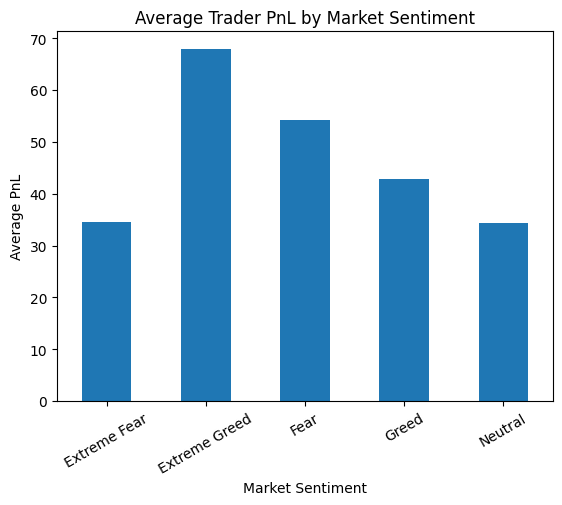

In [59]:
merged.groupby('classification')['closed_pnl'].mean().plot(
    kind='bar',
    title='Average Trader PnL by Market Sentiment',
    ylabel='Average PnL',
    xlabel='Market Sentiment',
    rot=30
)
plt.show()


In [60]:
merged.groupby('classification')['profit'].mean().sort_values()


classification
Extreme Fear     0.370607
Greed            0.384828
Neutral          0.396991
Fear             0.420768
Extreme Greed    0.464943
Name: profit, dtype: float64

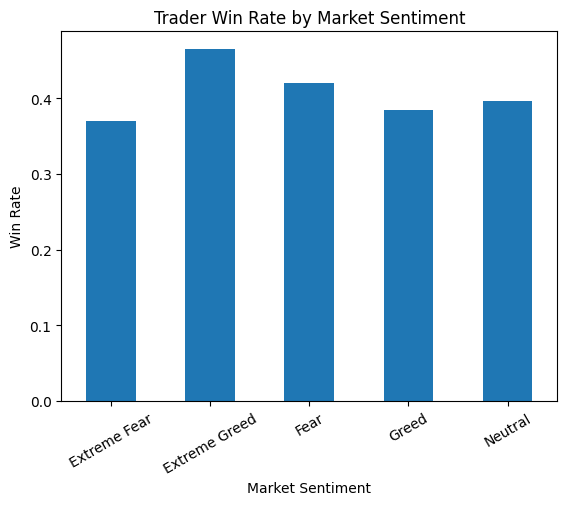

In [61]:
merged.groupby('classification')['profit'].mean().plot(
    kind='bar',
    title='Trader Win Rate by Market Sentiment',
    ylabel='Win Rate',
    xlabel='Market Sentiment',
    rot=30
)
plt.show()


8. Key Insights

Insight 1: Profitability vs Market Sentiment

Average trader profitability increases as market sentiment shifts from
Fear to Greed. Trades executed during Extreme Greed periods show the
highest average profit and loss (PnL), while Neutral and Extreme Fear
periods exhibit lower average profitability.

This suggests that bullish market sentiment encourages higher-risk,
higher-reward trading behavior.

Insight 2: Win Rate vs Market Sentiment

Trader win rates improve as market sentiment becomes more positive.
Extreme Greed periods demonstrate the highest win rates, indicating
stronger momentum-driven trading success.

In contrast, Extreme Fear periods show lower win rates, reflecting
greater uncertainty and increased market risk.


9. Conclusion

This analysis demonstrates a clear relationship between Bitcoin market
sentiment and trader behavior. Both average profitability and win rates
increase as sentiment moves from Fear to Greed, with Extreme Greed
yielding the strongest performance.

These findings suggest that incorporating market sentiment indicators
into trading strategies can improve risk management, trade timing, and
overall decision-making in crypto markets.
